<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
%matplotlib inline
import seaborn as sns

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [3]:
#TO DO:
key = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df = pd.read_csv('pima-indians-diabetes.csv', names=key)
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [ ]:
#TO DO:
Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skinfold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)

In [ ]:
# tieu de cua df la 1 dong data, nen sau khi phats hien quay lai sua header = None
df.shape


(768, 9)

In [ ]:
df.columns


Index(['NumTimesPrg', 'PlGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns',
       'BMI', 'DiPedFunc', 'Age', 'HasDiabetes'],
      dtype='object')

In [ ]:
df.info


<bound method DataFrame.info of      NumTimesPrg  PlGlcConc  BloodP  ...  DiPedFunc  Age  HasDiabetes
0              6        148      72  ...      0.627   50            1
1              1         85      66  ...      0.351   31            0
2              8        183      64  ...      0.672   32            1
3              1         89      66  ...      0.167   21            0
4              0        137      40  ...      2.288   33            1
..           ...        ...     ...  ...        ...  ...          ...
763           10        101      76  ...      0.171   63            0
764            2        122      70  ...      0.340   27            0
765            5        121      72  ...      0.245   30            0
766            1        126      60  ...      0.349   47            1
767            1         93      70  ...      0.315   23            0

[768 rows x 9 columns]>

In [ ]:
df.describe()


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum()


NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

In [ ]:
df.isnull().sum() 

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

In [ ]:
df.dtypes

NumTimesPrg        int64
PlGlcConc          int64
BloodP             int64
SkinThick          int64
TwoHourSerIns      int64
BMI              float64
DiPedFunc        float64
Age                int64
HasDiabetes        int64
dtype: object

# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [4]:
#TO DO:
corr = df.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

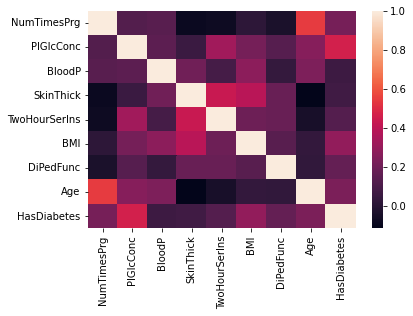

In [5]:
#TO DO:
%matplotlib inline
sns.heatmap(corr)

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [17]:
np.fill_diagonal(corr.values, np.nan)
corr['HasDiabetes'].sort_values(ascending=False)

PlGlcConc        0.466581
BMI              0.292695
Age              0.238356
NumTimesPrg      0.221898
DiPedFunc        0.173844
TwoHourSerIns    0.130548
SkinThick        0.074752
BloodP           0.065068
HasDiabetes           NaN
Name: HasDiabetes, dtype: float64

## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

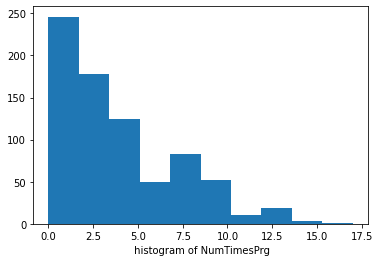

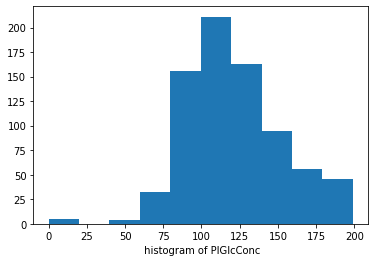

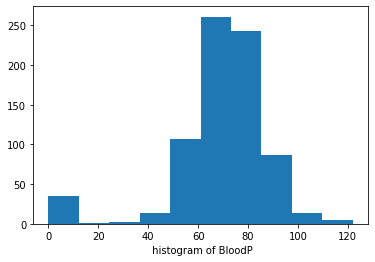

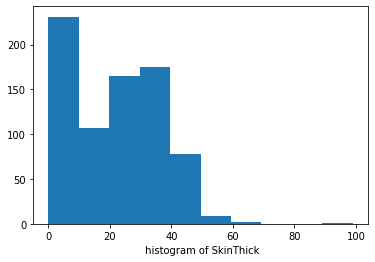

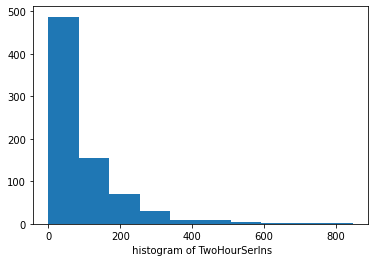

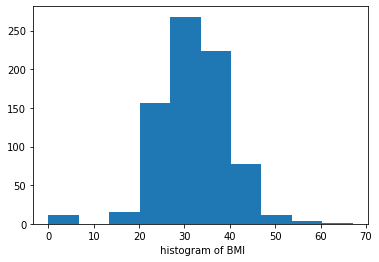

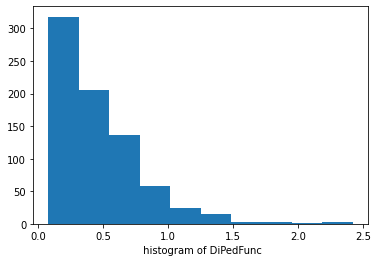

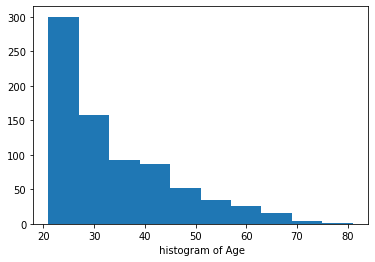

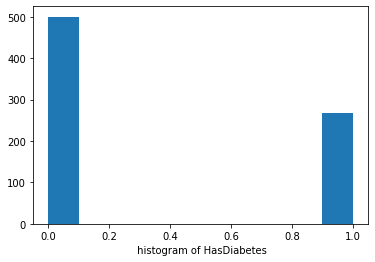

In [ ]:
#TO DO:
# nhận thấy các biến dữ liệu trong bài toán là các biến liên tục và có dạng của phân bố chuẩn (normal distribution)
for i in df.columns:
    x = df[i]
    plt.hist(x)
    plt.xlabel(' histogram of {}'.format(i))
    plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [ ]:
#TO DO:
# thay median cho BMI
a = df[df['BMI']!=0]
b = a['BMI'].median()
df['BMI'] = df['BMI'].replace(0, b)
# thay median cho BloodP
bl = df[df['BloodP']!=0]
bl1 = bl['BloodP'].median()
df['BloodP'] = df['BloodP'].replace(0,bl1)
# thay median cho PLGL
pl = df[df['PlGlcConc']!=0]
pl1 = pl['PlGlcConc'].median()
df['PlGlcConc'] = df['PlGlcConc'].replace(0,pl1)
# thay median cho skinthick
sk = df[df['SkinThick']!=0]
sk1 = pl['SkinThick'].median()
df['SkinThick'] = df['SkinThick'].replace(0,sk1)
# thay median cho Towhours
two = df[df['TwoHourSerIns']!=0]
two1 = pl['TwoHourSerIns'].median()
df['TwoHourSerIns'] = df['TwoHourSerIns'].replace(0,two1)
df


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,36,33.6,0.627,50,1
1,1,85,66,29,36,26.6,0.351,31,0
2,8,183,64,23,36,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,36,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,23,36,30.1,0.349,47,1


## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [ ]:
#TO DO:
from sklearn.preprocessing import StandardScaler
# lọc các biến
X_Scale = df.iloc[:,:-1]
# lọc output
y_scale = df.iloc[:,-1]
# scale data theo mean=0 và phương sai = 1 theo standardscaler 
#còn Normalization là phương pháp scale dữ liệu từ miền giá trị bất kì sang miền giá trị nằm trong khoảng 0 đến 1, nên theo đầu bài ta chọn
# standardscaler
scaler = StandardScaler()
scaler.fit(X_Scale)
df_scale = scaler.transform(X_Scale)
df_scale

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [ ]:
#TO DO:
# tách data theo data_scaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scale, y_scale, test_size= 0.2, random_state=7)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(614, 8) (614,) (154, 8) (154,)


# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

*italicized text*### TO DO:
1. Chúng ta cần data normalization vì để giảm đi sự chênh lệnh giá trị giữa các feature khi tính toán. Ví dụ giá trị tuôi từ 20-80, còn pregnant ranges 0 đến 17
2. split data trước khi train vì lấy 1 phần data để đánh giá xem model có hiệu quả không bằng cách chia data lam 2 pần train và test

### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [ ]:
#TO DO:
# calculate full_dataset
rate_full_dataset = len(df[df['HasDiabetes']==1])/len(df['HasDiabetes'])
# calculate rate_train
rate_train_data = pd.DataFrame(y_train)
positive_train = rate_train_data[rate_train_data['HasDiabetes']==1]
rate_train = len(positive_train)/len(rate_train_data)
# calculate rate_test
rate_test_data = pd.DataFrame(y_test)
positive_test = rate_test_data[rate_test_data['HasDiabetes']==1]
rate_test = len(positive_test)/len(rate_test_data)
rate_full_dataset, rate_train, rate_test

(0.3489583333333333, 0.34364820846905536, 0.37012987012987014)

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [ ]:
from sklearn.metrics import  f1_score
from sklearn.metrics import jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [ ]:
k_grid = GridSearchCV(estimator= KNeighborsClassifier(),param_grid= {'n_neighbors': np.arange(1,50)},cv=5)
k_grid.fit(X_train,y_train)
k_grid.best_params_

{'n_neighbors': 26}

In [ ]:
#TO DO:
# dùng chuẩn 2 và weights = distabce để thể hiện sự ưu tiên hơn cho các điểm ở gần
knn = KNeighborsClassifier(n_neighbors = 26, p=2, weights = 'distance')
knn.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=26, weights='distance')

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.
1. n-neighbors = 26 đây là số điểm lân cận với khoảng cách gần nhất được tối ưu dựa trên Gridsearch.
2. p=2 thể hiện tính khoảng cách theo chuẩn 2 norm
3. weights = 'distance' là việc đánh trọng số lớn hơn cho các điểm ở gần điểm kiểm thử hơn, còn mặc định là uniform là các điểm có sự ảnh hưởng như nhau.

### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
#TO DO:
y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)

f1_knn_train = f1_score(y_train,y_pred_train)
j_knn_train = accuracy_score(y_train,y_pred_train)

f1_knn_test = metrics.f1_score(y_test,y_pred)
j_knn_test = metrics.accuracy_score(y_test,y_pred)

f1_knn_train,f1_knn_test, j_knn_train, j_knn_test

(1.0, 0.6666666666666666, 1.0, 0.7922077922077922)

In [ ]:
f1_scores['test']['KNN']= round(f1_knn_test,4)
jaccard_scores['test']['KNN'] = round(j_knn_test,4)

f1_scores['train']['KNN'] = round(f1_knn_train,4)
jaccard_scores['train']['KNN'] = round(j_knn_train,4)

f1_scores, jaccard_scores

({'test': {'DT': 0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 0.6667,
   'LR': 0,
   'SVM': 0},
  'train': {'DT': 0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 1.0,
   'LR': 0,
   'SVM': 0}},
 {'test': {'DT': 0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 0.7922,
   'LR': 0,
   'SVM': 0},
  'train': {'DT': 0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 1.0,
   'LR': 0,
   'SVM': 0}})

# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [ ]:
import graphviz
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None,max_leaf_nodes=None, 
min_impurity_decrease=0.0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_tree_test = DT.predict(X_test)
y_tree_train = DT.predict(X_train)

f1_tree_train = f1_score(y_train,y_tree_train)
j_tree_train = accuracy_score(y_train,y_tree_train)

f1_tree_test = metrics.f1_score(y_test,y_tree_test)
j_tree_test = metrics.accuracy_score(y_test,y_tree_test)

f1_tree_train, f1_tree_test, j_tree_train, j_tree_test

(1.0, 0.6034482758620691, 1.0, 0.7012987012987013)

In [ ]:
f1_scores['test']['DT']= round(f1_tree_test,4)
jaccard_scores['test']['DT'] = round(j_tree_test,4)

f1_scores['train']['DT']= round(f1_tree_train,4)
jaccard_scores['train']['DT'] = round(j_tree_train,4)

f1_scores, jaccard_scores

({'test': {'DT': 0.6034,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 0.6667,
   'LR': 0,
   'SVM': 0},
  'train': {'DT': 1.0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 1.0,
   'LR': 0,
   'SVM': 0}},
 {'test': {'DT': 0.7013,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 0.7922,
   'LR': 0,
   'SVM': 0},
  'train': {'DT': 1.0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 1.0,
   'LR': 0,
   'SVM': 0}})

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


In [ ]:
#TO DO:
1. criterion: Lựa chọn entropy vì các biến trên là liên tục
2. max_depth: Độ sâu tối đa cho một cây quyết định. Đối với mô hình bị quá khớp thì chúng ta cần giảm độ sâu và vị khớp thì gia tăng độ sâu.
3. min_samples_split: Kích thước mẫu tối thiểu được yêu cầu để tiếp tục phân chia đối với node quyết định.
   Được sử dụng để tránh kích thước của node lá quá nhỏ nhằm giảm thiểu hiện tượng quá khớp.
4. max_features: Số lượng các biến được lựa chọn để tìm kiếm ra biến phân chia tốt nhất ở mỗi lượt phân chia.
5. max_leaf_nodes: Số lượng các node lá tối đa của cây quyết định. Thường được thiết lập khi muốn kiểm soát hiện tượng quá khớp.
6.min_impurity_decrease: Chúng ta sẽ tiếp tục phân chia một node nếu như sự suy giảm của độ tinh khiết nếu phân chia lớn hơn ngưỡng này.

# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
from sklearn.svm import SVC

In [ ]:
#TO DO:
model_svc = SVC(kernel='linear', C=0.05,decision_function_shape='ovr')
model_svc.fit(X_train,y_train)

y_pred_svm = model_svc.predict(X_test)

f1_svm_test = metrics.f1_score(y_test,y_pred_svm)
jaccard_svm_test = metrics.accuracy_score(y_test,y_pred_svm)

f1_svm_test , jaccard_svm_test

(0.6391752577319588, 0.7727272727272727)

In [ ]:
model1 = SVC(kernel='rbf', C=1.2,decision_function_shape='ovr')
model1.fit(X_train,y_train)

y_svm1_test = model1.predict(X_test)
y_svm1_train = model1.predict(X_train)

f1_svm1_train = metrics.f1_score(y_train,y_svm1_train)
j_svm1_train = metrics.accuracy_score(y_train,y_svm1_train)

f1_svm1_test = metrics.f1_score(y_test,y_svm1_test)
j_svm1_test = metrics.accuracy_score(y_test,y_svm1_test)

f1_svm1_train, f1_svm1_test, j_svm1_train, j_svm1_test

(0.7093333333333334,
 0.7326732673267327,
 0.8224755700325733,
 0.8246753246753247)

In [ ]:
model2 = SVC(kernel='poly', C=1,decision_function_shape='ovr')
model2.fit(X_train,y_train)

y_svm2 = model2.predict(X_test)

f1_svm2 = metrics.f1_score(y_test,y_svm2)
j_svm2 = metrics.accuracy_score(y_test,y_svm2)

f1_svm2 , j_svm2

(0.5476190476190477, 0.7532467532467533)

In [ ]:
model3 = SVC(kernel='sigmoid', C=0.05,decision_function_shape='ovr')
model3.fit(X_train,y_train)

y_svm3 = model3.predict(X_test)

f1_svm3 = metrics.f1_score(y_test,y_svm3)
j_svm3 = metrics.accuracy_score(y_test,y_svm3)

f1_svm3 , j_svm3

(0.6464646464646465, 0.7727272727272727)

In [ ]:
f1_scores['test']['SVM']= round(f1_svm1_test,4)
jaccard_scores['test']['SVM'] = round(j_svm1_test,4)

f1_scores['train']['SVM']= round(f1_svm1_train,4)
jaccard_scores['train']['SVM'] = round(j_svm1_train,4)

f1_scores, jaccard_scores

({'test': {'DT': 0.6034,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 0.6667,
   'LR': 0,
   'SVM': 0.7327},
  'train': {'DT': 1.0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 1.0,
   'LR': 0,
   'SVM': 0.7093}},
 {'test': {'DT': 0.7013,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 0.7922,
   'LR': 0,
   'SVM': 0.8247},
  'train': {'DT': 1.0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 1.0,
   'LR': 0,
   'SVM': 0.8225}})

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


In [ ]:
#TO DO:
1. decision_function_shape = 'ovr' .Đối với bài toán phân loại nhị phân thì chon 'ovr'(one vs rest) tương ứng với dự báo xác suất tương ứng với nhãn(0,1)
2. C=1 thể hiện ảnh hưởng của sai số phân loại lên hàm mất mát
3. kernel='rbf' chonj vi co ket qua tot nhat

# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#TO DO:
model_logistic = LogisticRegression(penalty='l2',tol=0.0001, C=1.0, fit_intercept=False, class_weight=None, solver='lbfgs', max_iter=100)
model_logistic.fit(X_train, y_train)

y_log_test = model_logistic.predict(X_test)
y_log_train = model_logistic.predict(X_train)

f1_log_test = metrics.f1_score(y_test,y_log_test)
j_log_test = metrics.accuracy_score(y_test,y_log_test)

f1_log_train = metrics.f1_score(y_train,y_log_train)
j_log_train = metrics.accuracy_score(y_train,y_log_train)

f1_log_train, f1_log_test, j_log_train, j_log_test

(0.6735112936344969, 0.7175572519083969, 0.741042345276873, 0.7597402597402597)

In [ ]:
f1_scores['train']['LR']= round(f1_log_train,4)
jaccard_scores['train']['LR'] = round(j_log_train,4)

f1_scores['test']['LR']= round(f1_log_test,4)
jaccard_scores['test']['LR'] = round(j_log_test,4)
f1_scores, jaccard_scores

({'test': {'DT': 0.6034,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 0.6667,
   'LR': 0.7176,
   'SVM': 0.7327},
  'train': {'DT': 1.0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 1.0,
   'LR': 0.6735,
   'SVM': 0.7093}},
 {'test': {'DT': 0.7013,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 0.7922,
   'LR': 0.7597,
   'SVM': 0.8247},
  'train': {'DT': 1.0,
   'EN_HARD': 0,
   'EN_SOFT': 0,
   'KNN': 1.0,
   'LR': 0.741,
   'SVM': 0.8225}})

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


In [ ]:
#TO DO:
1. tot = 0.0001 là giá trị bao dung (tolarance) để dừng cập nhật gradient descent nếu khoảng thay đổi của hàm mất mát sau một bước huấn luyện nhỏ hơn 0.0001
2. max_iter =100 là số lượt huấn luyện tối đa.
3. fit_intercept = Fasle để qui định không sử dụng trọng số tự do (chính là 
 không bị phụ thuộc vào dữ liệu) hay không.
4. solver = 'lbfgs' là phương pháp để giải bài toán tối ưu đối với cross entropy. Trong đó có: liblinear, sag, saga, newton-cg. 
Đối với dữ liệu kích thước nhỏ thì liblinear sử dụng sẽ phù hợp hơn.
Trái lại sag, saga có tốc độ huấn luyện nhanh hơn cho dữ liệu lớn.
5. penalty = : là dạng hàm được sử dụng làm thành phần điều chuẩn (regularization term) ở đây dùng chuẩn 2
6. C = 1.0 Hệ số nhân của thành phần điều chuẩn.
7. class_weight = None: Trọng số được nhân thêm ở mỗi nhóm.
Thường được sử dụng trong trường hợp mẫu mất cân bằng giữa các nhóm để dự báo nhóm thiểu số tốt hơn. 
Trong số có tác dụng điều chỉnh mức độ phạt nếu dự báo sai một mẫu theo nhãn ground truth của mẫu. 
Nếu không được xác định thì ta hiểu trọng số nhóm là cân bằng.

# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 21, p=2, weights = 'distance')
DT = DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None,max_leaf_nodes=None,min_impurity_decrease=0.0)
model_logistic = LogisticRegression(penalty='l2',tol=0.0001, C=1.0, fit_intercept=False, class_weight=None, solver='lbfgs', max_iter=100)
model = SVC(kernel='linear', C=1,decision_function_shape='ovr',probability = True)

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [ ]:
#TO DO:
vote = VotingClassifier(estimators=[('knn', knn), ('dt', DT), ('log', model_logistic),('svm',model)], voting='soft')
vote.fit(X_train, y_train)

y_v_test = vote.predict(X_test)
y_v_train = vote.predict(X_train)

f1_soft_train = f1_score(y_train,y_v_train)
j_soft_train = accuracy_score(y_train,y_v_train)

f1_soft_test = metrics.f1_score(y_test,y_v_test)
j_soft_test= metrics.accuracy_score(y_test,y_v_test)

f1_soft_train, f1_soft_test, j_soft_train, j_soft_test


(1.0, 0.7222222222222222, 1.0, 0.8051948051948052)

In [ ]:
f1_scores['test']['EN_SOFT']= round(f1_soft_test,4)
jaccard_scores['test']['EN_SOFT'] = round(j_soft_test,4)

f1_scores['train']['EN_SOFT']= round(f1_soft_train,4)
jaccard_scores['train']['EN_SOFT'] = round(j_soft_train,4)

f1_scores, jaccard_scores

({'test': {'DT': 0.6034,
   'EN_HARD': 0,
   'EN_SOFT': 0.7222,
   'KNN': 0.6667,
   'LR': 0.7176,
   'SVM': 0.7327},
  'train': {'DT': 1.0,
   'EN_HARD': 0,
   'EN_SOFT': 1.0,
   'KNN': 1.0,
   'LR': 0.6735,
   'SVM': 0.7093}},
 {'test': {'DT': 0.7013,
   'EN_HARD': 0,
   'EN_SOFT': 0.8052,
   'KNN': 0.7922,
   'LR': 0.7597,
   'SVM': 0.8247},
  'train': {'DT': 1.0,
   'EN_HARD': 0,
   'EN_SOFT': 1.0,
   'KNN': 1.0,
   'LR': 0.741,
   'SVM': 0.8225}})

### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [ ]:
#TO DO:
vote_hard = VotingClassifier(estimators=[('knn', knn), ('dt', DT), ('log', model_logistic),('svm',model)], voting='hard')
vote_hard.fit(X_train, y_train)

y_h_test = vote_hard.predict(X_test)
y_h_train = vote_hard.predict(X_train)

f1_h_train = f1_score(y_train,y_h_train)
j_h_train = accuracy_score(y_train,y_h_train)
f1_h_test = metrics.f1_score(y_test,y_h_test)
j_h_test= metrics.accuracy_score(y_test,y_h_test)
f1_h_train, f1_h_test, j_h_train, j_h_test

(0.8746666666666667,
 0.6734693877551021,
 0.9234527687296417,
 0.7922077922077922)

In [ ]:
f1_scores['test']['EN_HARD']= round(f1_h_test,4)
jaccard_scores['test']['EN_HARD'] = round(j_h_test,4)

f1_scores['train']['EN_HARD']= round(f1_h_train,4)
jaccard_scores['train']['EN_HARD'] = round(j_h_train,4)

f1_scores, jaccard_scores

({'test': {'DT': 0.6034,
   'EN_HARD': 0.6735,
   'EN_SOFT': 0.7222,
   'KNN': 0.6667,
   'LR': 0.7176,
   'SVM': 0.7327},
  'train': {'DT': 1.0,
   'EN_HARD': 0.8747,
   'EN_SOFT': 1.0,
   'KNN': 1.0,
   'LR': 0.6735,
   'SVM': 0.7093}},
 {'test': {'DT': 0.7013,
   'EN_HARD': 0.7922,
   'EN_SOFT': 0.8052,
   'KNN': 0.7922,
   'LR': 0.7597,
   'SVM': 0.8247},
  'train': {'DT': 1.0,
   'EN_HARD': 0.9235,
   'EN_SOFT': 1.0,
   'KNN': 1.0,
   'LR': 0.741,
   'SVM': 0.8225}})

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [ ]:
final1 = pd.DataFrame(f1_scores)
final1 = final1.rename(columns={'train':'f1_train','test':'f1_test'})
final1

,f1_train,f1_test
KNN,1.0000,0.6667
DT,1.0000,0.6034
SVM,0.7093,0.7327
LR,0.6735,0.7176
EN_HARD,0.8747,0.6735
EN_SOFT,1.0000,0.7222


In [ ]:
final2 = pd.DataFrame(jaccard_scores)
final2 = final2.rename(columns={'train':'J_train','test':'J_test'})
final2

,J_train,J_test
KNN,1.0000,0.7922
DT,1.0000,0.7013
SVM,0.8225,0.8247
LR,0.7410,0.7597
EN_HARD,0.9235,0.7922
EN_SOFT,1.0000,0.8052


In [ ]:
final = pd.concat([final1,final2],axis=1)
final

,f1_train,f1_test,J_train,J_test
KNN,1.0000,0.6667,1.0000,0.7922
DT,1.0000,0.6034,1.0000,0.7013
SVM,0.7093,0.7327,0.8225,0.8247
LR,0.6735,0.7176,0.7410,0.7597
EN_HARD,0.8747,0.6735,0.9235,0.7922
EN_SOFT,1.0000,0.7222,1.0000,0.8052


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:
1. Hiệu suất:  Một nhóm có thể đưa ra dự đoán tốt hơn và đạt được hiệu suất tốt hơn bất kỳ mô hình đóng góp đơn lẻ nào.
2. Tính mạnh mẽ : Một tập hợp làm giảm sự lan truyền hoặc phân tán của các dự đoán và hiệu suất của mô hình.